Global Power Plant Database
Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Find the dataset link below. 
https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNetCV


from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore
from scipy import stats

In [2]:
from sklearn.metrics import confusion_matrix,classification_report,plot_roc_curve


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [4]:
df.to_csv("India_PowerPlantDatabase.csv")

In [5]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

There is a lot of missing data accross many features

In [8]:
100*(df.isnull().sum()/len(df))

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.066079
longitude                     5.066079
primary_fuel                  0.000000
other_fuel1                  78.083700
other_fuel2                  99.889868
other_fuel3                 100.000000
commissioning_year           41.850220
owner                        62.334802
source                        0.000000
url                           0.000000
geolocation_source            2.092511
wepp_id                     100.000000
year_of_capacity_data        42.731278
generation_gwh_2013          57.709251
generation_gwh_2014          55.837004
generation_gwh_2015          53.193833
generation_gwh_2016          51.872247
generation_gwh_2017          51.211454
generation_data_source       50.440529
estimated_generation_gwh    100.000000
dtype: float64

In [9]:
df['Total']=df['generation_gwh_2013']+df['generation_gwh_2014']+ df['generation_gwh_2015']+df['generation_gwh_2016']+df[ 'generation_gwh_2017']

In [10]:
100*(df.isnull().sum()/len(df))

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.066079
longitude                     5.066079
primary_fuel                  0.000000
other_fuel1                  78.083700
other_fuel2                  99.889868
other_fuel3                 100.000000
commissioning_year           41.850220
owner                        62.334802
source                        0.000000
url                           0.000000
geolocation_source            2.092511
wepp_id                     100.000000
year_of_capacity_data        42.731278
generation_gwh_2013          57.709251
generation_gwh_2014          55.837004
generation_gwh_2015          53.193833
generation_gwh_2016          51.872247
generation_gwh_2017          51.211454
generation_data_source       50.440529
estimated_generation_gwh    100.000000
Total                    

Even Total  feature has 58% missing data so dropping that as well

generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh' have more than 20% missing data so dropping them

In [11]:
df.drop(['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh','Total'],axis=1,inplace=True)

wepp_id,other_fuel3 has 100% missing data so dropping them

In [12]:
df.drop(['wepp_id','other_fuel3'],axis=1,inplace=True)

In [13]:
100*(df.isnull().sum()/len(df))

country                   0.000000
country_long              0.000000
name                      0.000000
gppd_idnr                 0.000000
capacity_mw               0.000000
latitude                  5.066079
longitude                 5.066079
primary_fuel              0.000000
other_fuel1              78.083700
other_fuel2              99.889868
commissioning_year       41.850220
owner                    62.334802
source                    0.000000
url                       0.000000
geolocation_source        2.092511
year_of_capacity_data    42.731278
dtype: float64

In [14]:
len(df['name'].value_counts())

908

In [15]:
len(df['gppd_idnr'].value_counts())

908

In [16]:
len(df['url'].value_counts())

304

name,dppd_idnr,'url' are only a indicative feature so dropping that as well

In [17]:
df.drop(['name','gppd_idnr','url'],axis=1,inplace=True)

In [18]:
100*(df.isnull().sum()/len(df))

country                   0.000000
country_long              0.000000
capacity_mw               0.000000
latitude                  5.066079
longitude                 5.066079
primary_fuel              0.000000
other_fuel1              78.083700
other_fuel2              99.889868
commissioning_year       41.850220
owner                    62.334802
source                    0.000000
geolocation_source        2.092511
year_of_capacity_data    42.731278
dtype: float64

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

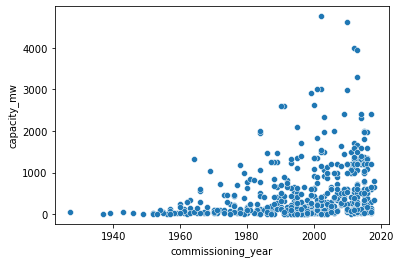

In [19]:
sns.scatterplot(x='commissioning_year',y='capacity_mw',data=df)

Using commisioning year feature creating another feature called as age

In [20]:
def returnAge(x):
    return 2020-x

In [21]:
df['Age']=df['commissioning_year'].apply(returnAge)

In [22]:
df['Age'].mean()

23.123106060606062

In [23]:
df['Age']=df['Age'].fillna(df['Age'].mean())

dropping the commission year feature`

In [24]:
df.drop('commissioning_year',axis=1,inplace=True)

In [25]:
len(df['owner'].value_counts())

280

In [26]:
df['owner'].value_counts().head(20)

Sterling Agro Industries ltd.                            4
Acc Acc ltd                                              4
Jk Cement ltd                                            4
Jaypee Ltd jccl)                                         3
Tata Power Solar Systems Limited (TPREL)                 3
Powerica Limited                                         3
Ujaas Energy Limited                                     3
Shri Ssk ltd                                             3
Government of India                                      3
Shree Sugars ltd                                         3
Enercon India Ltd.                                       3
Karnataka Power Corporation Limited                      3
Hindustan Zinc ltd                                       3
Shree Naman Developers Ltd.                              3
SWPPL                                                    3
Maharashtra State Power Generation Co Ltd (MAHAGENCO)    3
Green Infra Solar Farms Private Limited (GIS)           

owner is almost a unique feature and doesnt affect the capacity or the primary Fuel  so dropping it

In [27]:
df.drop('owner',axis=1,inplace=True)

In [28]:
100*(df.isnull().sum()/len(df))

country                   0.000000
country_long              0.000000
capacity_mw               0.000000
latitude                  5.066079
longitude                 5.066079
primary_fuel              0.000000
other_fuel1              78.083700
other_fuel2              99.889868
source                    0.000000
geolocation_source        2.092511
year_of_capacity_data    42.731278
Age                       0.000000
dtype: float64

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

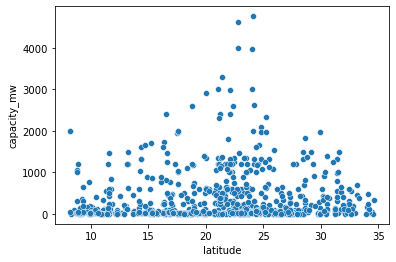

In [29]:
sns.scatterplot(x='latitude',y='capacity_mw',data=df)

Between the latitudes 20 and 25 there is higher capacity

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

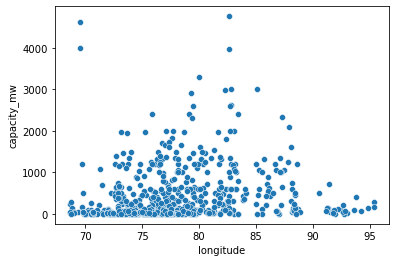

In [30]:
sns.scatterplot(x='longitude',y='capacity_mw',data=df)

Between the longitudes 80 and 85 there is higher capacity

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

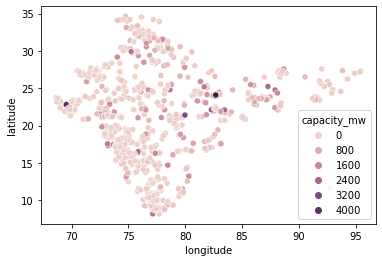

In [31]:
sns.scatterplot(x='longitude',y='latitude',data=df,hue='capacity_mw')

dropping the rows with missing data for latitude and longitude and we lose only 5%

In [32]:
df[df['longitude'].isnull() | df['latitude'].isnull()]

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,year_of_capacity_data,Age
14,IND,India,9.00,NaN,NaN,Hydro,NaN,NaN,Central Electricity Authority,WRI,2018.0,33.000000
25,IND,India,50.00,NaN,NaN,Solar,NaN,NaN,National Renewable Energy Laboratory,NaN,NaN,5.000000
43,IND,India,450.00,NaN,NaN,Hydro,NaN,NaN,Central Electricity Authority,WRI,2018.0,5.000000
46,IND,India,600.00,NaN,NaN,Coal,Oil,NaN,Central Electricity Authority,WRI,2018.0,5.000000
68,IND,India,5.00,NaN,NaN,Wind,NaN,NaN,CDM,NaN,NaN,23.123106
73,IND,India,25.20,NaN,NaN,Oil,NaN,NaN,Central Electricity Authority,WRI,2018.0,20.000000
179,IND,India,5.00,NaN,NaN,Hydro,NaN,NaN,Central Electricity Authority,WRI,2018.0,23.000000
193,IND,India,125.00,NaN,NaN,Wind,NaN,NaN,CDM,NaN,NaN,23.123106
202,IND,India,15.00,NaN,NaN,Hydro,NaN,NaN,Central Electricity Authority,WRI,2018.0,24.000000
209,IND,India,75.00,NaN,NaN,Wind,NaN,NaN,CDM,NaN,NaN,23.123106


In [33]:
df[df['longitude'].isnull() | df['latitude'].isnull()].index

Int64Index([ 14,  25,  43,  46,  68,  73, 179, 193, 202, 209, 251, 330, 331,
            333, 387, 421, 423, 431, 436, 441, 467, 479, 480, 484, 503, 539,
            541, 546, 656, 675, 681, 706, 712, 713, 732, 733, 742, 771, 774,
            775, 776, 777, 785, 829, 885, 887],
           dtype='int64')

In [34]:
df=df.drop(df[df['longitude'].isnull() | df['latitude'].isnull()].index,axis=0)

In [35]:
100*(df.isnull().sum()/len(df))

country                   0.000000
country_long              0.000000
capacity_mw               0.000000
latitude                  0.000000
longitude                 0.000000
primary_fuel              0.000000
other_fuel1              77.494200
other_fuel2              99.883991
source                    0.000000
geolocation_source        0.000000
year_of_capacity_data    42.807425
Age                       0.000000
dtype: float64

In [36]:
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [37]:
100*(df.isnull().sum()/len(df))

country                0.000000
country_long           0.000000
capacity_mw            0.000000
latitude               0.000000
longitude              0.000000
primary_fuel           0.000000
other_fuel1           77.494200
other_fuel2           99.883991
source                 0.000000
geolocation_source     0.000000
Age                    0.000000
dtype: float64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

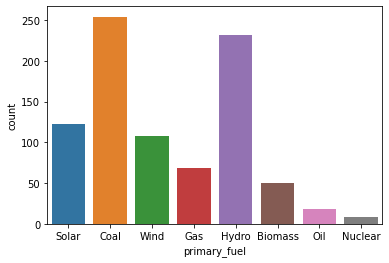

In [38]:
sns.countplot(df['primary_fuel'])

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

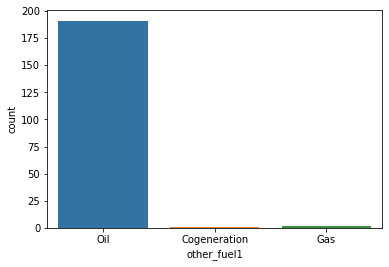

In [39]:
sns.countplot(df['other_fuel1'])

<AxesSubplot:xlabel='other_fuel2', ylabel='count'>

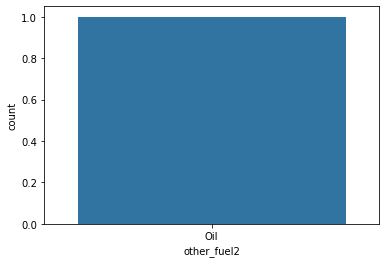

In [40]:
sns.countplot(df['other_fuel2'])

In [41]:
df.head()

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,Age
0,IND,India,2.5,28.1839,73.2407,Solar,NaN,NaN,National Renewable Energy Laboratory,National Renewable Energy Laboratory,9.000000
1,IND,India,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,23.123106
2,IND,India,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,23.123106
3,IND,India,135.0,23.8712,91.3602,Gas,NaN,NaN,Central Electricity Authority,WRI,16.000000
4,IND,India,1800.0,21.9603,82.4091,Coal,Oil,NaN,Central Electricity Authority,WRI,5.000000


In [42]:
df.iloc[769]

country                                         IND
country_long                                  India
capacity_mw                                   260.0
latitude                                    15.1839
longitude                                   76.6622
primary_fuel                                   Coal
other_fuel1                            Cogeneration
other_fuel2                                     Oil
source                Central Electricity Authority
geolocation_source                              WRI
Age                                            21.0
Name: 812, dtype: object

In [43]:
df[df['other_fuel2']=='Oil'].index

Int64Index([812], dtype='int64')

In [44]:
def returnFuel(x):
    #print(x['other_fuel2'])
    if str(x['other_fuel1'])!='nan':
        return x['other_fuel1']
    elif str(x['other_fuel2'])!='nan':
        return x['other_fuel2']
    else:
        return 'nan'

In [45]:
df['other_Fuel']=df.apply(returnFuel,axis=1)

In [46]:
df['other_Fuel']

0      nan
1      nan
2      nan
3      nan
4      Oil
      ... 
903    Oil
904    nan
905    nan
906    nan
907    nan
Name: other_Fuel, Length: 862, dtype: object

In [47]:
df.drop(['other_fuel1','other_fuel2'],axis=1,inplace=True)

<AxesSubplot:xlabel='other_Fuel', ylabel='count'>

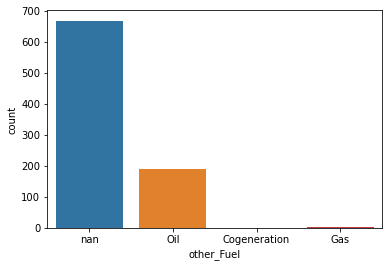

In [48]:
sns.countplot(df['other_Fuel'])

In [49]:
100*(df.isnull().sum()/len(df))

country               0.0
country_long          0.0
capacity_mw           0.0
latitude              0.0
longitude             0.0
primary_fuel          0.0
source                0.0
geolocation_source    0.0
Age                   0.0
other_Fuel            0.0
dtype: float64

no missing data now

In [50]:
df['source'].value_counts().head(10)

Central Electricity Authority                            493
CDM                                                      109
Lancosola                                                 10
National Thermal Power Corporation (NTPC)                  6
National Renewable Energy Laboratory                       4
Jk Cement ltd                                              4
Reliance Power Ltd                                         4
Rajasthan Renewable Energy Corporation Limited (RREC)      4
Acc Acc ltd                                                4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)      4
Name: source, dtype: int64

dropping source feature as it is only a identifier value

In [51]:
df['country'].value_counts()

IND    862
Name: country, dtype: int64

In [52]:
df['country_long'].value_counts()

India    862
Name: country_long, dtype: int64

dropping country and country_long feature as it is only has a single value

In [53]:
df.drop(['country','country_long','source'],axis=1,inplace=True)

In [54]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'geolocation_source', 'Age', 'other_Fuel'],
      dtype='object')

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

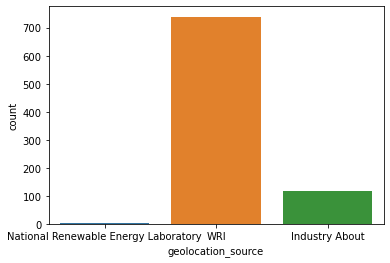

In [55]:
sns.countplot(df['geolocation_source'])

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

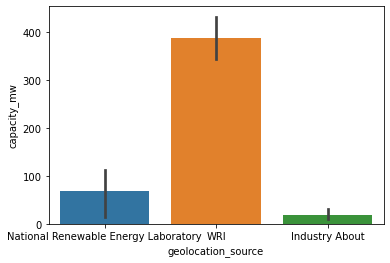

In [56]:
sns.barplot(data=df,x='geolocation_source',y='capacity_mw')

In [57]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'geolocation_source', 'Age', 'other_Fuel'],
      dtype='object')

In [58]:
df.describe()

,capacity_mw,latitude,longitude,Age
count,862.000000,862.000000,862.000000,862.000000
mean,334.911962,21.196189,77.447848,23.176257
std,591.757208,6.248627,4.907260,12.816572
min,0.000000,8.168900,68.644700,2.000000
25%,18.000000,16.771575,74.258975,17.000000
50%,61.200000,21.778300,76.719250,23.123106
75%,417.502500,25.516375,79.441475,23.123106
max,4760.000000,34.649000,95.408000,93.000000


In [59]:
df1=df.copy()

In [60]:
df=pd.get_dummies(df)

In [61]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Age', 'primary_fuel_Biomass',
       'primary_fuel_Coal', 'primary_fuel_Gas', 'primary_fuel_Hydro',
       'primary_fuel_Nuclear', 'primary_fuel_Oil', 'primary_fuel_Solar',
       'primary_fuel_Wind', 'geolocation_source_Industry About',
       'geolocation_source_National Renewable Energy Laboratory',
       'geolocation_source_WRI', 'other_Fuel_Cogeneration', 'other_Fuel_Gas',
       'other_Fuel_Oil', 'other_Fuel_nan'],
      dtype='object')

In [62]:
df.drop('other_Fuel_nan',axis=1,inplace=True)

In [63]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Age', 'primary_fuel_Biomass',
       'primary_fuel_Coal', 'primary_fuel_Gas', 'primary_fuel_Hydro',
       'primary_fuel_Nuclear', 'primary_fuel_Oil', 'primary_fuel_Solar',
       'primary_fuel_Wind', 'geolocation_source_Industry About',
       'geolocation_source_National Renewable Energy Laboratory',
       'geolocation_source_WRI', 'other_Fuel_Cogeneration', 'other_Fuel_Gas',
       'other_Fuel_Oil'],
      dtype='object')

<AxesSubplot:>

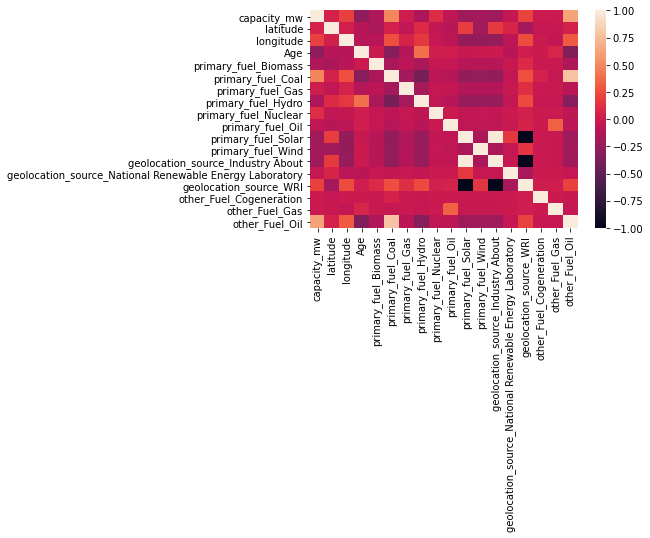

In [64]:
sns.heatmap(df.corr())

<AxesSubplot:>

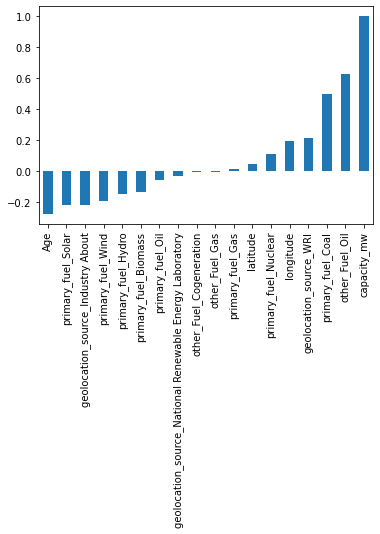

In [65]:
df.corr()['capacity_mw'].sort_values().plot(kind='bar')

In [66]:
y=df['capacity_mw']
X=df.drop('capacity_mw',axis=1)

In [67]:
X.head()

,latitude,longitude,Age,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,other_Fuel_Cogeneration,other_Fuel_Gas,other_Fuel_Oil
0,28.1839,73.2407,9.000000,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,24.7663,74.6090,23.123106,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,21.9038,69.3732,23.123106,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,23.8712,91.3602,16.000000,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,21.9603,82.4091,5.000000,0,1,0,0,0,0,0,0,0,0,1,0,0,1


## identifying the best random state

In [68]:
minRMSE="null"
minRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test,pred))
    if(minRMSE=="null" or RMSE<minRMSE):
        minRMSE=RMSE
        minRS=i
        
print("min RMSE is",minRMSE,"on random state",minRS)

min RMSE is 344.3508108193278 on random state 144


min RMSE is 344.3508108193278 on random state 144


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=144)


## Scaling

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [72]:
x_train_scale=scaler.fit_transform(X_train)


In [73]:
x_test_scale=scaler.transform(X_test)
x_test_scale

array([[-2.06461780e-01, -9.60916705e-01,  1.37990437e-01, ...,
         0.00000000e+00, -4.16666667e-02,  1.82711408e+00],
       [-1.08922429e+00, -3.20445939e-01, -3.88451748e-03, ...,
         0.00000000e+00, -4.16666667e-02, -5.47311200e-01],
       [-1.51893328e+00,  4.11465162e-01, -3.91141583e-01, ...,
         0.00000000e+00, -4.16666667e-02,  1.82711408e+00],
       ...,
       [-1.98413561e-01,  3.54920568e-01, -3.88451748e-03, ...,
         0.00000000e+00, -4.16666667e-02, -5.47311200e-01],
       [ 4.59704814e-01,  1.09402751e+00, -1.07145418e+00, ...,
         0.00000000e+00, -4.16666667e-02,  1.82711408e+00],
       [-1.92195607e+00,  3.61839884e-04, -3.88451748e-03, ...,
         0.00000000e+00, -4.16666667e-02, -5.47311200e-01]])

In [74]:
lr=LinearRegression()
lr.fit(x_train_scale,y_train)
pred=lr.predict(x_test_scale)

lrR2=r2_score(y_test, pred)
lrR2

0.535775293947254

In [75]:
lrRMSE=np.sqrt(mean_squared_error(y_test,pred))
lrRMSE

344.35081081932896

scaling is not needed as with and without sclaing RMSE is same

In [76]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

lrR2=r2_score(y_test, pred)
lrR2

0.5357752939472571

In [77]:
lrRMSE=np.sqrt(mean_squared_error(y_test,pred))
lrRMSE

344.3508108193278

In [78]:
svr=SVR()
svr.fit(X_train,y_train)
pred=svr.predict(X_test)
svrR2=r2_score(y_test, pred)
svrR2

-0.21156983094959814

In [79]:
svrRMSE=np.sqrt(mean_squared_error(y_test,pred))
svrRMSE

556.302754379057

In [80]:
sgd=SGDRegressor()
sgd.fit(X_train,y_train)
pred=sgd.predict(X_test)
sgdR2=r2_score(y_test, pred)
sgdR2

-4.1276679353025454e+18

In [81]:
sgdRMSE=np.sqrt(mean_squared_error(y_test,pred))
sgdRMSE

1026808276999.4684

In [82]:
knnR=KNeighborsRegressor()
knnR.fit(X_train,y_train)
pred=knnR.predict(X_test)
knnR2=r2_score(y_test, pred)
knnR2

0.34944330517155475

In [83]:
knnrRMSE=np.sqrt(mean_squared_error(y_test,pred))
knnrRMSE

407.64259748376264

## frinding cross val score for each model

In [84]:
from sklearn.pipeline import Pipeline

In [85]:
lrCV=cross_val_score(lr,X,y,cv=5,scoring='r2').mean()
lrCV


0.41944784648325434

In [86]:
svrCV=cross_val_score(SVR(),X,y,cv=5,scoring='r2').mean()
svrCV

-0.21366425394566368

svr has a negative R2 which means it fits the data very poorly

In [87]:

sgdCV=cross_val_score(sgd,X,y,cv=5,scoring='r2').mean()
sgdCV


-1.909373396716946e+19

sgd has a negative R2 which means it fits the data very poorly

In [88]:

knnrCV=cross_val_score(knnR,X,y,cv=5,scoring='r2').mean()
knnrCV

0.1956109197707028

In [89]:
def rmseValue(model,indepen,depend):
    y_pred=model.predict(indepen)
    return np.sqrt(mean_squared_error(y_pred,depend))



lrCV1=cross_val_score(lr,X,y,cv=5,scoring=rmseValue).mean()


svrCV1=cross_val_score(SVR(),X,y,cv=5,scoring=rmseValue).mean()

sgdCV1=cross_val_score(sgd,X,y,cv=5,scoring=rmseValue).mean()


knnrCV1=cross_val_score(knnR,X,y,cv=5,scoring=rmseValue).mean()


### Comparing r2 scores for normal model and cross val score

In [90]:
print(lrR2-lrCV)
print(svrR2-svrCV)
print(sgdR2-sgdCV)
print(knnR2-knnrCV)

0.11632744746400275
0.002094422996065548
1.4966066031866913e+19
0.15383238540085195


Taking Linear Regression as other models have a negative R2 which means they fit the data very poorly
and also the difference is very less for Linear Regression(0.116)

In [91]:
print(lrRMSE-lrCV1)
print(svrRMSE-svrCV1)
print(sgdRMSE-sgdCV1)
print(knnrRMSE-knnrCV1)

-94.35926450457174
-79.93726364095471
-789700325274.6425
-101.41017478722904


Even the difference between RMSE is low for SVR, KNN they dont fit the dataa well as they have a negative r2 Score 
So choosing Linear Regression

## Hyper Parameter Tuning using a pipeline

In [92]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



In [93]:
X.head()

,latitude,longitude,Age,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,other_Fuel_Cogeneration,other_Fuel_Gas,other_Fuel_Oil
0,28.1839,73.2407,9.000000,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,24.7663,74.6090,23.123106,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,21.9038,69.3732,23.123106,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,23.8712,91.3602,16.000000,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,21.9603,82.4091,5.000000,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [94]:
operations = [('LR',LinearRegression())]

In [95]:
help(LinearRegression())

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subt

In [96]:
param_grid = {'LR__normalize':[True,False],
             'LR__positive':[True,False],
            'LR__fit_intercept':[True,False]
             }

In [97]:
pipe=Pipeline(operations)

In [98]:
grid = GridSearchCV(pipe,param_grid,cv=5,scoring='neg_mean_squared_error',verbose=10)

In [99]:
grid.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START LR__fit_intercept=True, LR__normalize=True, LR__positive=True
[CV 1/5; 1/8] END LR__fit_intercept=True, LR__normalize=True, LR__positive=True;, score=-148473.601 total time=   0.0s
[CV 2/5; 1/8] START LR__fit_intercept=True, LR__normalize=True, LR__positive=True
[CV 2/5; 1/8] END LR__fit_intercept=True, LR__normalize=True, LR__positive=True;, score=-94192.615 total time=   0.0s
[CV 3/5; 1/8] START LR__fit_intercept=True, LR__normalize=True, LR__positive=True
[CV 3/5; 1/8] END LR__fit_intercept=True, LR__normalize=True, LR__positive=True;, score=-291357.713 total time=   0.0s
[CV 4/5; 1/8] START LR__fit_intercept=True, LR__normalize=True, LR__positive=True
[CV 4/5; 1/8] END LR__fit_intercept=True, LR__normalize=True, LR__positive=True;, score=-198917.591 total time=   0.0s
[CV 5/5; 1/8] START LR__fit_intercept=True, LR__normalize=True, LR__positive=True
[CV 5/5; 1/8] END LR__fit_intercept=True, LR__normalize

GridSearchCV(cv=5, estimator=Pipeline(steps=[('LR', LinearRegression())]),
             param_grid={'LR__fit_intercept': [True, False],
                         'LR__normalize': [True, False],
                         'LR__positive': [True, False]},
             scoring='neg_mean_squared_error', verbose=10)

In [100]:
grid.best_estimator_

Pipeline(steps=[('LR', LinearRegression(normalize=True))])

In [101]:
grid.best_params_

{'LR__fit_intercept': True, 'LR__normalize': True, 'LR__positive': False}

In [102]:
grid.best_score_

-199785.78786439932

In [103]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_LR__fit_intercept', 'param_LR__normalize', 'param_LR__positive', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [104]:
pd.DataFrame(data=grid.cv_results_,columns=grid.cv_results_.keys())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_LR__fit_intercept,param_LR__normalize,param_LR__positive,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006060,0.002074,0.000433,0.000866,True,True,True,"{'LR__fit_intercept': True, 'LR__normalize': T...",-148473.601239,-94192.615242,-291357.713285,-198917.590818,-273168.268006,-201221.957718,74220.893776,7
1,0.006197,0.002518,0.002429,0.003219,True,True,False,"{'LR__fit_intercept': True, 'LR__normalize': T...",-151156.420882,-92515.524112,-285725.047492,-197420.450021,-272111.496815,-199785.787864,72792.697659,1
2,0.005444,0.006804,0.012211,0.006750,True,False,True,"{'LR__fit_intercept': True, 'LR__normalize': F...",-148519.131308,-94322.252210,-291357.713285,-198917.590818,-273168.268006,-201256.991125,74177.038112,8
3,0.011164,0.005884,0.002375,0.002592,True,False,False,"{'LR__fit_intercept': True, 'LR__normalize': F...",-151156.420882,-92515.524112,-285725.047492,-197511.539758,-272111.496815,-199804.005812,72792.114799,4
4,0.003149,0.006299,0.013519,0.006906,False,True,True,"{'LR__fit_intercept': False, 'LR__normalize': ...",-148522.953666,-93714.621952,-290053.294278,-198968.451588,-273168.268006,-200885.517898,74036.210765,5
5,0.013684,0.003912,0.000406,0.000498,False,True,False,"{'LR__fit_intercept': False, 'LR__normalize': ...",-151156.420882,-92515.524112,-285725.047492,-197511.539758,-272111.496815,-199804.005812,72792.114799,2
6,0.012879,0.005499,0.000000,0.000000,False,False,True,"{'LR__fit_intercept': False, 'LR__normalize': ...",-148522.953666,-93714.621952,-290053.294278,-198968.451588,-273168.268006,-200885.517898,74036.210765,5
7,0.007433,0.006794,0.006315,0.005492,False,False,False,"{'LR__fit_intercept': False, 'LR__normalize': ...",-151156.420882,-92515.524112,-285725.047492,-197511.539758,-272111.496815,-199804.005812,72792.114799,2


In [105]:
grid.best_estimator_

Pipeline(steps=[('LR', LinearRegression(normalize=True))])

In [106]:
grid.best_params_

{'LR__fit_intercept': True, 'LR__normalize': True, 'LR__positive': False}

The best estimator has {'LR__fit_intercept': True,
 'LR__normalize': True,
 'LR__positive': False}

## Training with best parameters

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=144)

In [108]:
param_grid = {'LR__normalize':[False],
             'LR__positive':[False],
              'LR__fit_intercept': [True]
             
             }
operations = [('LR',LinearRegression())]

pipe=Pipeline(operations)

In [109]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('LR', LinearRegression())])

In [110]:
pred=pipe.predict(X_test)

In [111]:
finalRMSE=np.sqrt(mean_squared_error(y_test,pred))
finalRMSE

346.8020134303366

final Root mean square error of the model is 346.8020134303366



## saving the model


In [112]:
import joblib
joblib.dump(pipe,"FinalModelIndiaCapacityPrediction.pkl")

['FinalModelIndiaCapacityPrediction.pkl']

### Training the model to predict Primary Fuel

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier

In [115]:
df1.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,Age,other_Fuel
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,9.000000,nan
1,98.0,24.7663,74.6090,Coal,WRI,23.123106,nan
2,39.2,21.9038,69.3732,Wind,WRI,23.123106,nan
3,135.0,23.8712,91.3602,Gas,WRI,16.000000,nan
4,1800.0,21.9603,82.4091,Coal,WRI,5.000000,Oil


In [116]:
XP=df1.drop('primary_fuel',axis=1)

In [117]:
yP=df1['primary_fuel']

In [120]:
XP.head()

,capacity_mw,latitude,longitude,geolocation_source,Age,other_Fuel
0,2.5,28.1839,73.2407,National Renewable Energy Laboratory,9.000000,nan
1,98.0,24.7663,74.6090,WRI,23.123106,nan
2,39.2,21.9038,69.3732,WRI,23.123106,nan
3,135.0,23.8712,91.3602,WRI,16.000000,nan
4,1800.0,21.9603,82.4091,WRI,5.000000,Oil


In [122]:
XP=pd.get_dummies(XP)

In [126]:
XP.drop('other_Fuel_nan',axis=1,inplace=True)

In [127]:
max_accu=0
maxRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(XP, yP, test_size=0.33, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    pred=dt.predict(X_test)
    accurac=accuracy_score(y_test,pred)
    #print(accurac*100,"at random state",i)
    if(accurac>max_accu):
        max_accu=accurac
        maxRS=i
        
print("best accuracy is",max_accu,"on random state",maxRS)

best accuracy is 0.887719298245614 on random state 121


best accuracy is 0.887719298245614 on random state 121


In [128]:
X_train, X_test, y_train, y_test = train_test_split(XP, yP, test_size=0.33, random_state=121)


### Scaling

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
scaler = StandardScaler()

In [131]:
x_train_scale=scaler.fit_transform(X_train)


In [133]:
x_test_scale=scaler.transform(X_test)

In [134]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train_scale,y_train)
pred=DTC.predict(x_test_scale)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

     Biomass       0.68      0.79      0.73        19
        Coal       0.95      0.91      0.93        94
         Gas       0.57      0.63      0.60        19
       Hydro       0.92      0.92      0.92        75
     Nuclear       0.00      0.00      0.00         2
         Oil       0.00      0.00      0.00         3
       Solar       1.00      1.00      1.00        35
        Wind       0.89      0.87      0.88        38

    accuracy                           0.88       285
   macro avg       0.63      0.64      0.63       285
weighted avg       0.88      0.88      0.88       285



Even without scaling it gave same accuracy So not doing scaling

In [135]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
pred=RFC.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Biomass       0.78      0.74      0.76        19
        Coal       0.90      0.94      0.92        94
         Gas       0.78      0.74      0.76        19
       Hydro       0.94      0.97      0.95        75
     Nuclear       0.00      0.00      0.00         2
         Oil       0.00      0.00      0.00         3
       Solar       1.00      1.00      1.00        35
        Wind       0.86      0.82      0.84        38

    accuracy                           0.89       285
   macro avg       0.66      0.65      0.65       285
weighted avg       0.88      0.89      0.89       285



In [136]:
svc=SVC()
svc.fit(X_train,y_train)
pred=svc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Biomass       0.00      0.00      0.00        19
        Coal       0.76      0.66      0.70        94
         Gas       0.00      0.00      0.00        19
       Hydro       0.31      0.84      0.45        75
     Nuclear       0.00      0.00      0.00         2
         Oil       0.00      0.00      0.00         3
       Solar       0.00      0.00      0.00        35
        Wind       0.00      0.00      0.00        38

    accuracy                           0.44       285
   macro avg       0.13      0.19      0.14       285
weighted avg       0.33      0.44      0.35       285



In [137]:
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
pred=ada.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Biomass       0.00      0.00      0.00        19
        Coal       0.93      0.15      0.26        94
         Gas       0.00      0.00      0.00        19
       Hydro       0.42      0.99      0.59        75
     Nuclear       0.00      0.00      0.00         2
         Oil       0.00      0.00      0.00         3
       Solar       1.00      1.00      1.00        35
        Wind       0.00      0.00      0.00        38

    accuracy                           0.43       285
   macro avg       0.29      0.27      0.23       285
weighted avg       0.54      0.43      0.36       285



Random Forest Classifier is the best algorithm with 89% accuracy

### Hyper Parameter Tuning

In [138]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [139]:
XP.head()

,capacity_mw,latitude,longitude,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,other_Fuel_Cogeneration,other_Fuel_Gas,other_Fuel_Oil
0,2.5,28.1839,73.2407,9.000000,0,1,0,0,0,0
1,98.0,24.7663,74.6090,23.123106,0,0,1,0,0,0
2,39.2,21.9038,69.3732,23.123106,0,0,1,0,0,0
3,135.0,23.8712,91.3602,16.000000,0,0,1,0,0,0
4,1800.0,21.9603,82.4091,5.000000,0,0,1,0,0,1


In [141]:
yP.head()

0    Solar
1     Coal
2     Wind
3      Gas
4     Coal
Name: primary_fuel, dtype: object

In [142]:
from sklearn.pipeline import Pipeline

In [143]:
operations = [('rfc',RandomForestClassifier())]
param_grid = {'rfc__criterion':['gini','entropy'],
           'rfc__max_features':['sqrt','log2']
             }
pipe=Pipeline(operations)

In [144]:
gcv=GridSearchCV(pipe,param_grid,cv=5,verbose=2,scoring='accuracy')


In [146]:
gcv.fit(XP,yP)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ........rfc__criterion=gini, rfc__max_features=sqrt; total time=   0.3s
[CV] END ........rfc__criterion=gini, rfc__max_features=sqrt; total time=   0.3s
[CV] END ........rfc__criterion=gini, rfc__max_features=sqrt; total time=   0.3s
[CV] END ........rfc__criterion=gini, rfc__max_features=sqrt; total time=   0.3s
[CV] END ........rfc__criterion=gini, rfc__max_features=sqrt; total time=   0.3s
[CV] END ........rfc__criterion=gini, rfc__max_features=log2; total time=   0.3s
[CV] END ........rfc__criterion=gini, rfc__max_features=log2; total time=   0.3s
[CV] END ........rfc__criterion=gini, rfc__max_features=log2; total time=   0.3s
[CV] END ........rfc__criterion=gini, rfc__max_features=log2; total time=   0.3s
[CV] END ........rfc__criterion=gini, rfc__max_features=log2; total time=   0.3s
[CV] END .....rfc__criterion=entropy, rfc__max_features=sqrt; total time=   0.3s
[CV] END .....rfc__criterion=entropy, rfc__max_fe

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rfc', RandomForestClassifier())]),
             param_grid={'rfc__criterion': ['gini', 'entropy'],
                         'rfc__max_features': ['sqrt', 'log2']},
             scoring='accuracy', verbose=2)

In [147]:
gcv.best_params_

{'rfc__criterion': 'gini', 'rfc__max_features': 'sqrt'}

In [148]:
gcv.best_estimator_

Pipeline(steps=[('rfc', RandomForestClassifier(max_features='sqrt'))])

In [149]:
gcv.best_score_

0.8735851592956042

### training with best params

In [150]:
df1.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,Age,other_Fuel
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,9.000000,nan
1,98.0,24.7663,74.6090,Coal,WRI,23.123106,nan
2,39.2,21.9038,69.3732,Wind,WRI,23.123106,nan
3,135.0,23.8712,91.3602,Gas,WRI,16.000000,nan
4,1800.0,21.9603,82.4091,Coal,WRI,5.000000,Oil


In [151]:
rfc=RandomForestClassifier(criterion='gini',max_features='sqrt')


operations = [('rfc',rfc)]
#operations = [('pca',pca),('rfc',rfc)]


pipe=Pipeline(operations)

In [153]:
XP=df1.drop('primary_fuel',axis=1)

In [154]:
yP=df1['primary_fuel']

In [155]:
XP=pd.get_dummies(XP)

In [159]:
XP.drop('other_Fuel_nan',axis=1,inplace=True)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(XP, yP, test_size=0.33, random_state=i)

In [161]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('rfc', RandomForestClassifier(max_features='sqrt'))])

In [162]:
pred = pipe.predict(X_test)

In [163]:
confusion_matrix(y_test,pred)

array([[10,  2,  0,  0,  0,  0,  0,  4],
       [ 1, 79,  0,  0,  0,  1,  0,  3],
       [ 1,  3, 11,  7,  0,  1,  0,  1],
       [ 0,  0,  0, 75,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  1,  0,  0,  0],
       [ 0,  1,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 48,  0],
       [ 5,  0,  0,  0,  0,  0,  0, 25]], dtype=int64)

In [165]:
from sklearn.metrics import plot_confusion_matrix

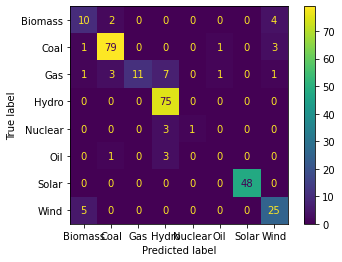

In [169]:
plot_confusion_matrix(pipe,X_test,y_test)

In [170]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Biomass       0.59      0.62      0.61        16
        Coal       0.93      0.94      0.93        84
         Gas       1.00      0.46      0.63        24
       Hydro       0.85      1.00      0.92        75
     Nuclear       1.00      0.25      0.40         4
         Oil       0.00      0.00      0.00         4
       Solar       1.00      1.00      1.00        48
        Wind       0.76      0.83      0.79        30

    accuracy                           0.87       285
   macro avg       0.77      0.64      0.66       285
weighted avg       0.88      0.87      0.86       285



#### Final accuracy achieved is 87%

In [ ]:
## Saving the model

In [171]:
import joblib
joblib.dump(pipe,"GlobalPowerPredictingPrimaryFuel.pkl")

['GlobalPowerPredictingPrimaryFuel.pkl']